## MODELO SIR  ##

### Integrantes ###

 - JORGE LUIS GONZALEZ DE LA CERDA
 - JOSÉ DANIEL GUTIÉRREZ GARCÍA
 - JOSÉ CARLOS LÓPEZ AGUILAR

### Introducción ###
La epidemiología matemática modela la propagación de enfermedades infecciosas en una comunidad. Su objetivo es entender los mecanismos que hacen posible que se lleve a cabo dicha propagación. Gracias al modelo SIR que tiene su origen en el trabajo de Kermack y McKendrick, se puede caracterizar la evolución de una epidemia que se propaga mediante contagio entre los individuos de una población..


### Objetivos ###
- Poner en práctica el conocimiento adquirido en el módulo 3 del curso.
- Hacer uso del modelo de Kermack y McKendrick para relacionar las variaciones de las tres poblaciones (Susceptible, Infectada y Recuperada) a través de la tasa de infección y el período infeccioso promedio.


### Modelo que representa el problema ###
El modelo básico SIR (Susceptibles-Infectados-Recuperados) de Kermack y McKendrick es un modelo de compartimentos donde la población bajo estudio se divide en clases epidemiológicas y se describe un flujo entre ellas; en este modelo el compartimento del centro mide la prevalencia, es decir, el número de casos de una enfermedad en la población en un tiempo dado, o sea, I(t).

El modelo básico SIR de Kermack y McKendrick asume que la población total N se mantiene constante en el tiempo, o sea, es la suma de los susceptibles más los infectados más los recuperados:

$$ N = S(t)+I(t)+R(t) $$

La transmisión es por contacto directo. Para transmitir la infección, un infeccioso hace contacto con βN individuos por unidad de tiempo. La probabilidad de contacto entre un infeccioso y un susceptible es S/N, luego el número de nuevas infecciones por unidad de tiempo es (βN)(S/N)I= βS I. Es decir, un infeccioso transmite la enfermedad con una tasa de contagio β, según la ley de acción de masas. Esto significa que los cambios en la población susceptible también se comportan según la ley de acción de masas. Por otra parte, una fracción ν de infectados por unidad de tiempo deja esa clase para convertirse en recuperados con inmunidad permanente. Esto conduce al sistema de ecuaciones diferenciales del modelo SIR:

$$ \frac{d}{dt} S(t) = -BS(t)I(t) $$

$$ \frac{d}{dt} I(t) = BS(t)I(t) - vI(t) $$

$$ \frac{d}{dt} R(t) = vI(t) $$

### Proceso ###

Lo primero que realizamos es importar las bibliotecas con las que vamos a trabajar

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Ponemos la población total a considerar, además agregamos: los valores iniciales de personas infectadas (I0), las personas que se recuperaron (R0) y las personas que están sujetas a infección inicialmente (S0), las cuales son el resto de la población

In [3]:
N = 100000
I0, R0 = 1, 0
S0 = N - I0 - R0

Obtenemos la Tasa de transmisión el cuál está representado por beta (β) y la Tasa de recuperación en 1/días representado por gamma (γ)

In [4]:
beta, gamma = 2.2, 1./5.2
t = np.linspace(0, 40, 40)

Utilizamos las ecuaciones diferenciales del modelo SIR

In [5]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Obtenemos el Vector de las condiciones iniciales y resolvemos el sistema de ecuaciones diferenciales, en la secuencia de días que ya definimos

In [6]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

### Visualización de los resultados ###
Trazamos los datos en tres curvas separadas para S(t), I(t) y R(t)

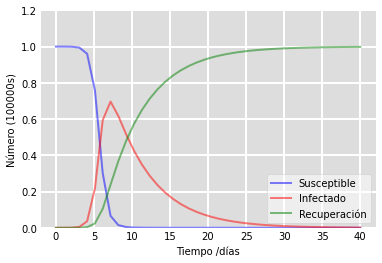

In [7]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/100000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/100000, 'r', alpha=0.5, lw=2, label='Infectado')
ax.plot(t, R/100000, 'g', alpha=0.5, lw=2, label='Recuperación')
ax.set_xlabel('Tiempo /días')
ax.set_ylabel('Número (100000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

### Conclusiones ###
Un sistema de salud con una buen organización, que se encuentre preparado para distintas situaciones de peligro y actualizado es una gran ventaja e importante para que los gobiernos puedan aprovechar las potencialidades de los modelos epidemiológicos. 
La calidad en la estimación de parámetros depende en gran medida de la calidad de los datos que el sistema de salud pueda proporcionar.

### Referencias ###
- (2020). Modelos matemáticos. Disponible en: http://www.scielo.org.co/scielo.php?pid=S1657-95342020000200009&script=sci_arttext&tlng=es .[Consultado el 5 de abril de 2022, a las 18:24 hrs.]
- Martín Barroso, Víctor. (2020). Una breve introducción al modelo SIR. Disponible en: https://eprints.ucm.es/id/eprint/60026/ .[Consultado el 5 de abril de 2022, a las 19:00 hrs.]